# <center> Bank Customers Churn Analysis </center>

### Term Project Milestone 1: Data Selection and EDA

#### Introduction
Customer churn is the most important factor for banks and other financial institutions. The main reason for this is retaining the existing customer is more cost-effective and also more profitable. The rapid advancement in technology and the invention of new banking services have also made it more important for banks to understand which factors influence customer churn and develop effective strategies to minimize it. In this context, the applications of Artificial Intelligence (AI) and machine learning can be used to predict customer churn and can provide valuable insights and help banks take proactive steps to retain a maximum number of their customers. The main purpose of this object is to develop a classification model that can predict whether a bank
customer will churn or not with the highest accuracy. The dataset used in this task is obtained from Kaggle. The dataset contains information about various customer attributes such as demographics, and financial and account-related activities. We can find factors that influence customer churn by analyzing this dataset and can provide recommendations for the bank to reduce customer churn and improve customer retention rate and satisfaction. 
The dataset used in this task is related to the bank customers churn and has been obtained from the kaggle.
The link of the dataset is given below: <br>
https://www.kaggle.com/datasets/santoshd3/bank-customers<br>
The dataset contains various customer attributes which be used to identify factors that influence customer
churn and develop effective strategies to minimize it. There are 14 attributes in the dataset which are: <br>
**RowNumber:** The row number in the dataset.<br>
**CustomerId:** Unique id of the customer.<br>
**Surname:** Last name of the customer.<br>
**CreditScore:** Credit Score of the customer.<br>
**Country:** Country of the Customer (e.g., France, Germany, Spain).<br>
**Gender:** Customer's gender (Male/Female).<br>
**Age:** Age of customer's in years.<br>
**Tenure:** The number of years customer has been with the bank.<br>
**Balance:** Customer's account balance.<br>
**NumOfProducts:** Number of banking products the customer uses (e.g., loans, credit cars, etc.).<br>
**HasCrCard:** Binary variable indicating whether customer has credit car (1) or not (0).<br>
**IsActiveMember:** A binary variable indicating whether the customer is an active member (1) or not (0).<br>
**EstimatedSalary:** The Customer's estimated annual salary. <br>
**HasCrCard:** Binary variable indicating whether customer has credit car (1) or not.<br>
The dataset used in this project is well described and provides the necessary information to developer the
customer churn prediction model. Although the additional data can enhanced the analysis, the existing
dataset is sufficient for building a comprehensive classification model.


#### Exploring the data

In [43]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import yellowbrick
from sklearn.model_selection import train_test_split #used to split data into training/test sets

In [2]:
df = pd.read_csv("Churn Modeling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

##### Observations
- There are total 10000 rows and 14 columns.
- Some columns like RowNumber, CustomerId, Surname are not very useful.
- The Exited column is target column with value 1 means the customer churned out and value 0 mean the customer didn't churn.
- The dataset has mix of numerical and categorical variables.

In [4]:
#data type of each column
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
#summary statistics for numerical variables
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#summary statistics for categroical variables
df.describe(include = 'object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


##### Observations
- There are no missing values in the data.

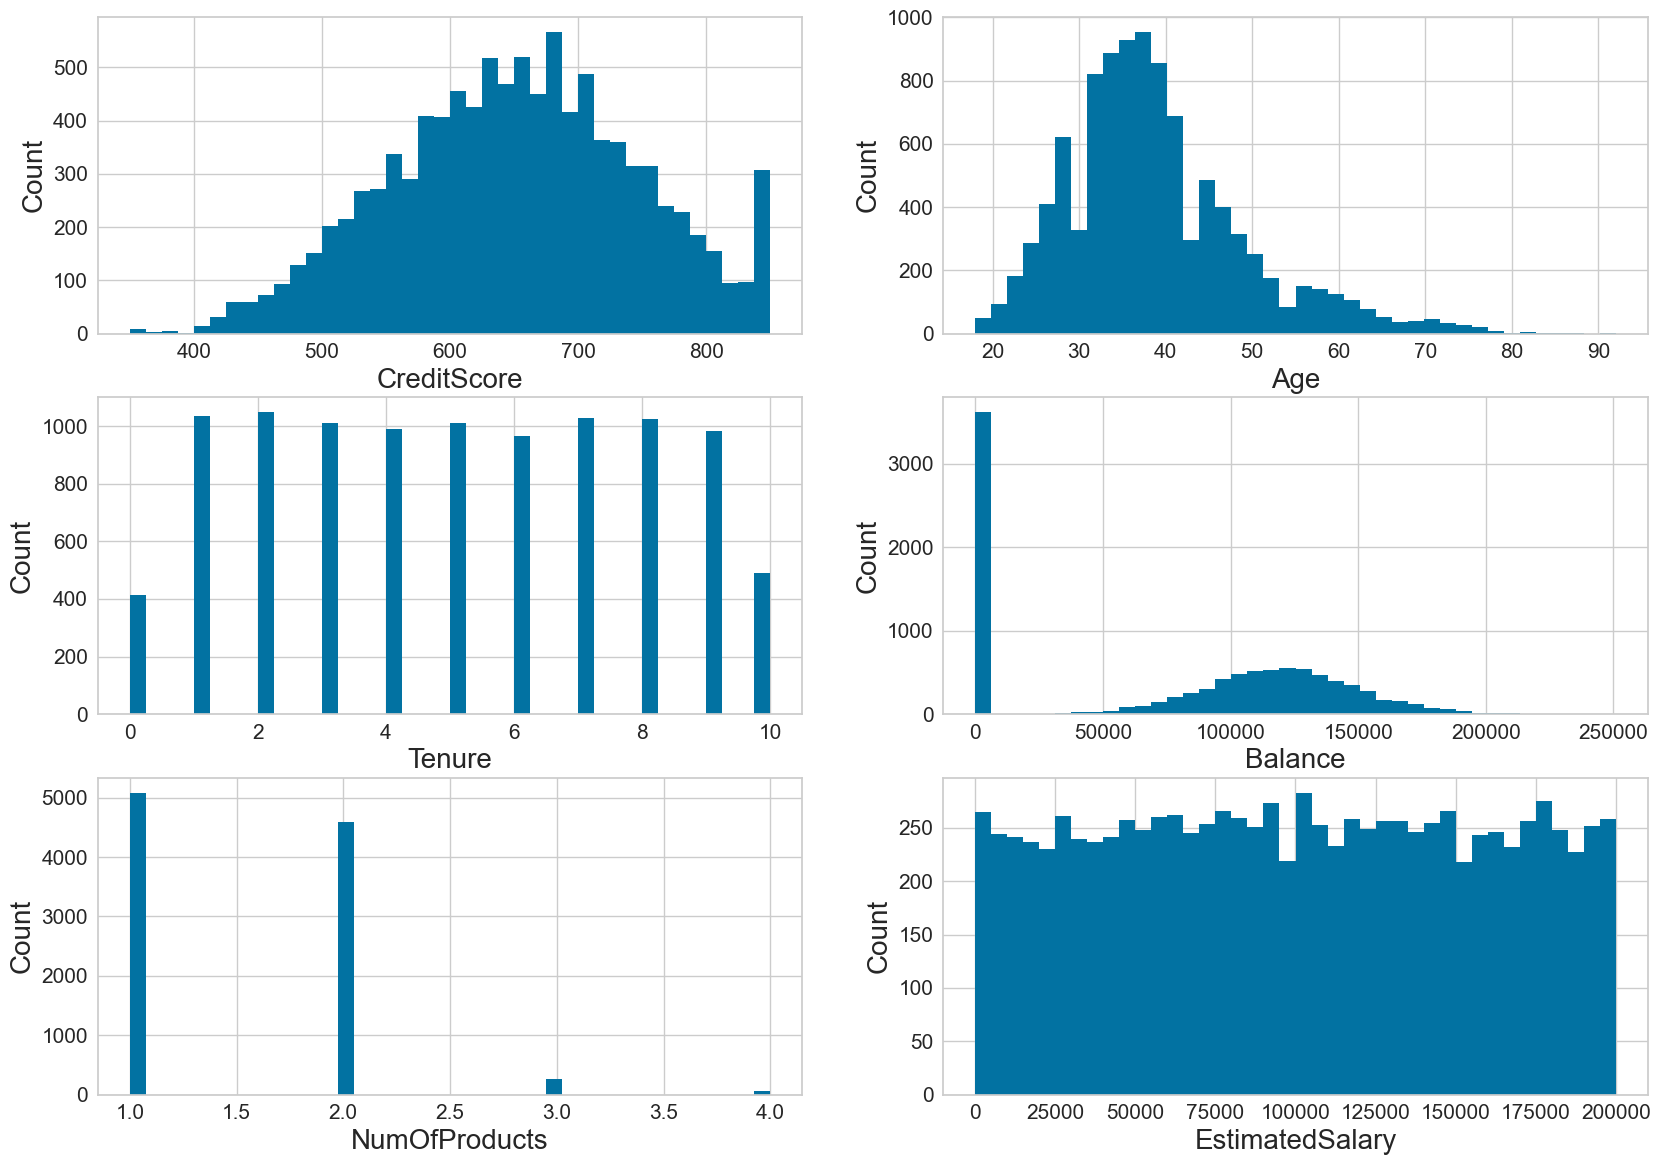

In [7]:
#histograms for numerical features
plt.rcParams['figure.figsize'] = (20, 14)
# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2)

#numerical fatures
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
               'EstimatedSalary']
xaxes = num_features
yaxes = ['Count', 'Count', 'Count', 'Count', 'Count', 'Count']
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

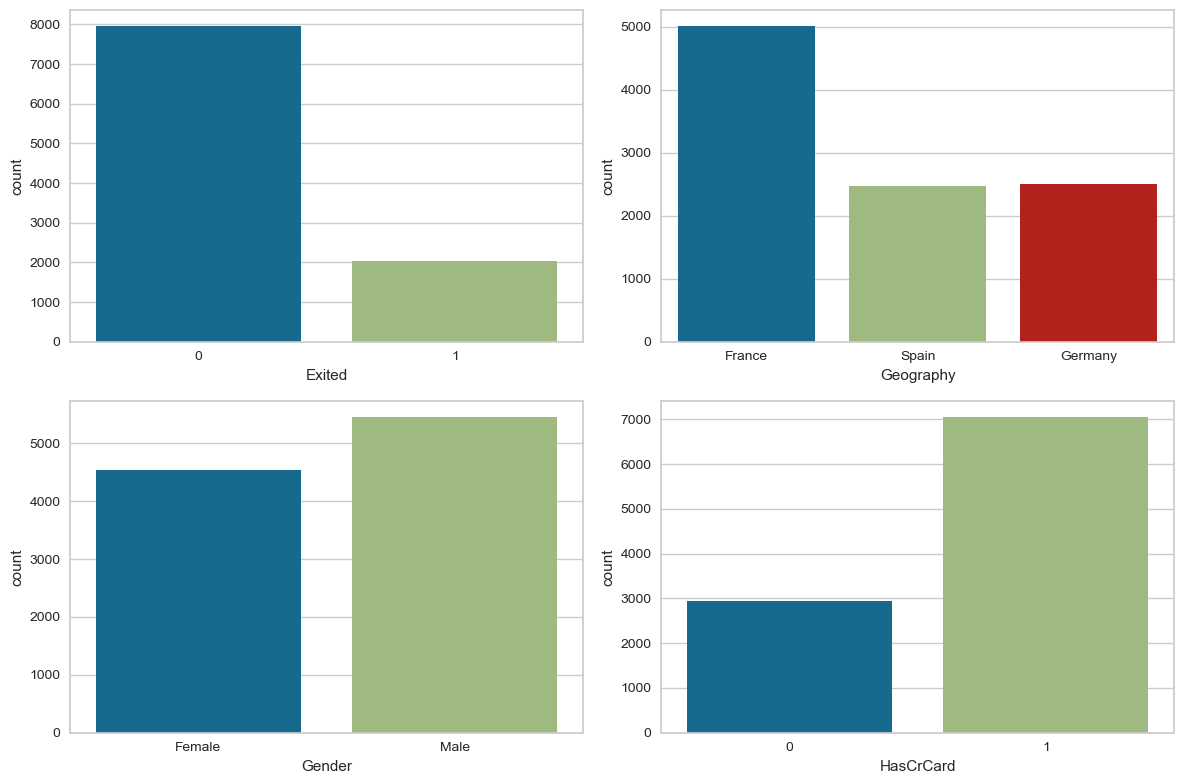

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot 1 - Exited
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Exited')

# Plot 2 - Geography
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Geography')

# Plot 3 - Gender
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Gender')

# Plot 4 - HasCrCard
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='HasCrCard')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


##### Observations
- Most of the customers in the dataset didn't churn out.
- Very few customers in the dataset churned out.
- Most of the customers in the dataset are from Germany.
- There are more male customers in the dataset as compare to female customers.
- Most of the customers in the dataset has credit card.

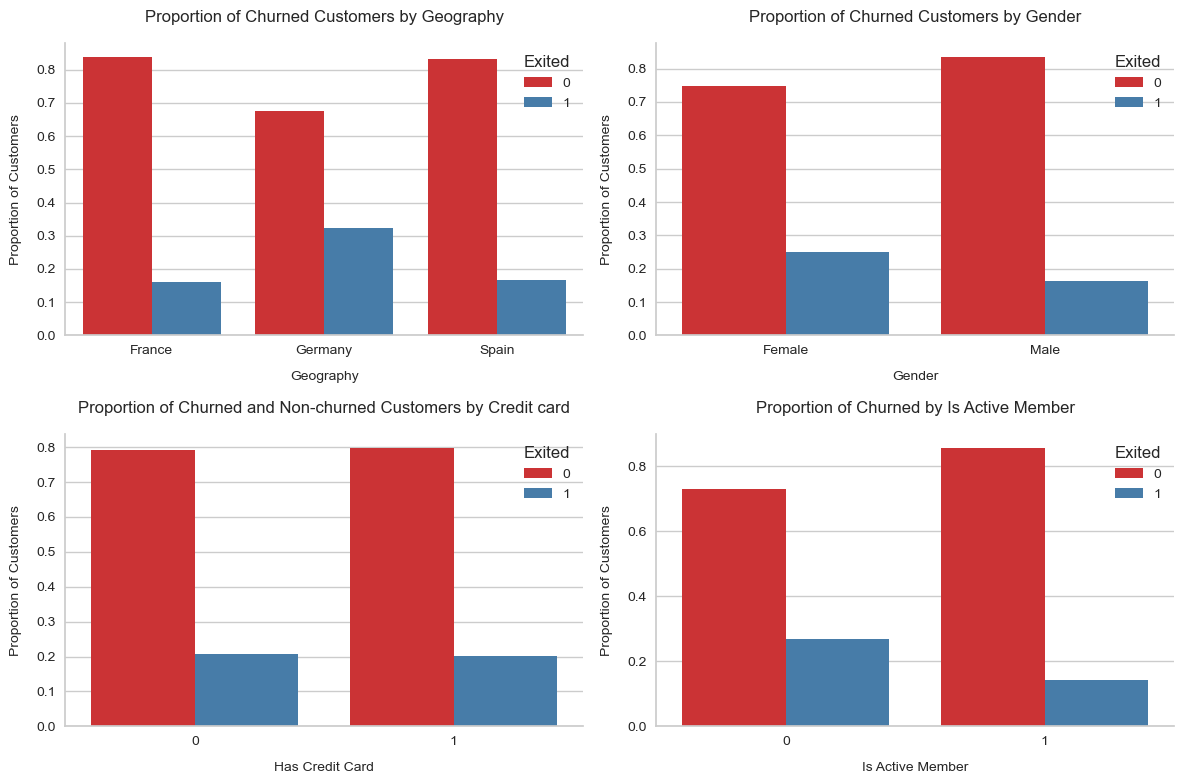

In [9]:
# plotting distribution of customers churn by geography
geography_churn = pd.crosstab(df['Geography'], df['Exited'], normalize='index').reset_index()
geography_churn_melted = pd.melt(geography_churn, id_vars='Geography', var_name='Exited', value_name='Proportion')
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
ax = sns.barplot(x='Geography', y='Proportion', hue='Exited', data=geography_churn_melted, palette="Set1")
plt.xlabel("Geography", fontsize=10, labelpad=10)
plt.ylabel("Proportion of Customers", fontsize=10, labelpad=10)
plt.title("Proportion of Churned Customers by Geography", fontsize=12, pad=15)
sns.despine(top=True, right=True)
plt.subplot(2,2,2)
#plotting relationship between Gender and Customers Churn
gender_churn = pd.crosstab(df['Gender'], df['Exited'], normalize='index').reset_index()
gender_churn_melted = pd.melt(gender_churn, id_vars='Gender', var_name='Exited', value_name = 'Proportion')
ax = sns.barplot(data=gender_churn_melted,x='Gender', y='Proportion', hue='Exited', palette = 'Set1')
plt.xlabel("Gender", fontsize=10, labelpad=10)
plt.ylabel("Proportion of Customers", fontsize=10, labelpad=10)
plt.title("Proportion of Churned Customers by Gender", fontsize=12, pad=15)
sns.despine(top=True, right=True)
#plotting relationship between Gender and Customers Churn
plt.subplot(2,2,3)
card_churn = pd.crosstab(df['HasCrCard'], df['Exited'], normalize='index').reset_index()
gender_churn_melted = pd.melt(card_churn, id_vars='HasCrCard', var_name='Exited', value_name='Proportion')
ax = sns.barplot(x='HasCrCard', y='Proportion', hue='Exited', data=gender_churn_melted, palette="Set1")
plt.xlabel("Has Credit Card", fontsize=10, labelpad=10)
plt.ylabel("Proportion of Customers", fontsize=10, labelpad=10)
plt.title("Proportion of Churned and Non-churned Customers by Credit card", fontsize=12, pad=15)
sns.despine(top=True, right=True)
#plotting relationship between Is Active Member and Customers Churn
plt.subplot(2,2, 4)
active_churn = pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index').reset_index()
gender_churn_melted = pd.melt(active_churn, id_vars='IsActiveMember', var_name='Exited', value_name='Proportion')
gender_churn_melted
ax = sns.barplot(x='IsActiveMember', y='Proportion', hue='Exited', data=gender_churn_melted, palette="Set1")
plt.xlabel("Is Active Member", fontsize=10, labelpad=10)
plt.ylabel("Proportion of Customers", fontsize=10, labelpad=10)
plt.title("Proportion of Churned by Is Active Member", fontsize=12, pad=15)
sns.despine(top=True, right=True)
plt.tight_layout()

plt.show()

##### Observations
- Highest proportion of customers from Germany have churned out.
- Second highest proportion of customers from Spain have churned out.
- Proportion of churned customers varied by geographical location.
- This could play an important role for predicting whether the customer will churn out or not.
- Female customers are more likely to churn out as compare to male customers.
- Non-Active customers are more likely to churn out as compare to active customers.

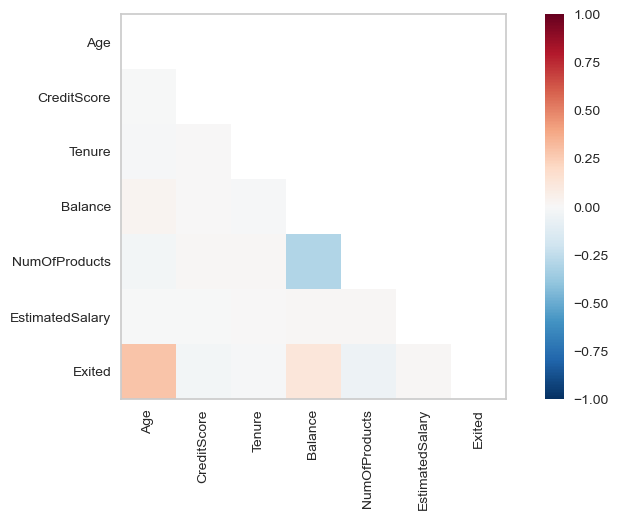

In [10]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

heat_map_features = ['Age', 'CreditScore', 'Tenure', 'Balance', 'NumOfProducts',
                    'EstimatedSalary', 'Exited']
# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df[heat_map_features].values

# instantiate the visualizer 
heat_map = Rank2D(features=heat_map_features, algorithm='pearson')
heat_map.fit_transform(X) #fit and tranform the data for the heat map
plt.show()          

##### Observations
- The numerical variables that are correlation with Exited are Age, Balance and Number of Products.